In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
df1.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


## Data Preprocessing

In [4]:
df1.columns

Index(['index', 'Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route',
       'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground',
       'Summary'],
      dtype='object')

In [5]:
df1.dtypes

index             int64
Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [6]:
df1.isnull().sum()

index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [7]:
df2 = df1.copy()

In [8]:
df2 = df1.drop(['Time','index','Flight #','Registration','cn/In','Ground','Summary'],axis=1)

In [9]:
df2.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0
3,09/09/1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0


In [10]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [11]:
df2.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0
2,1913-08-06,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0
3,1913-09-09,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0


In [12]:
df2['Year'] = df2['Date'].dt.year

In [13]:
df2.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Year
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1908
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,1912
2,1913-08-06,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,1913
3,1913-09-09,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,1913
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,1913


## EDA

### Deaths per year

In [14]:
deathsPerYear = df2.groupby(['Year']).sum()['Fatalities']

<AxesSubplot:title={'center':'Deaths per year'}, xlabel='Year', ylabel='No. of deaths'>

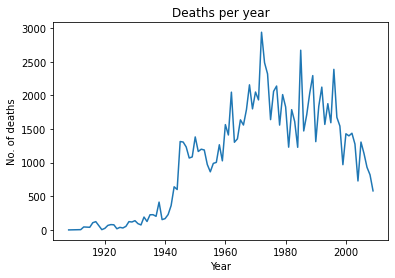

In [15]:
deathsPerYear.plot(x='Year',y='Fatalities',kind='line',ylabel='No. of deaths',title='Deaths per year')

### Top Operators Fatalities count

In [16]:
topOperators = df2.groupby(['Operator']).sum()['Fatalities'].sort_values(ascending=False)[:20]

<AxesSubplot:ylabel='Operator'>

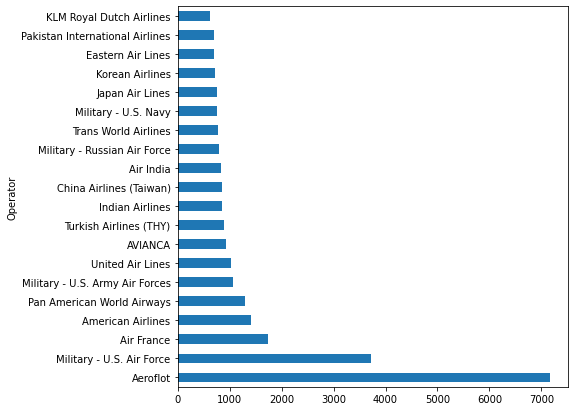

In [17]:
topOperators.plot(kind='barh',figsize=(7,7))

### Top Routes in Crashes

In [18]:
topCrashedRoutes = df2.groupby(['Route']).count().sort_values(by='Fatalities',ascending=False)[:20]

<AxesSubplot:title={'center':'routes vs total fatalities'}, ylabel='Route'>

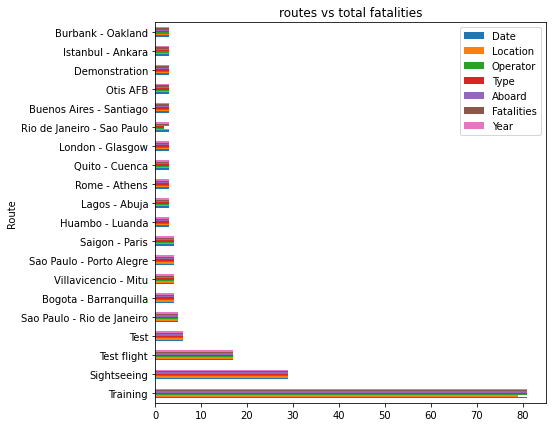

In [24]:
topCrashedRoutes.plot(kind='barh',figsize=(7,7),title='routes vs total fatalities')

### top crashed planes types

In [20]:
topCrashedPlaneTypes = df2.groupby(['Type']).count().sort_values(by='Fatalities',ascending=False)[:20]

<AxesSubplot:title={'center':'plane types vs total fatalities'}, ylabel='Type'>

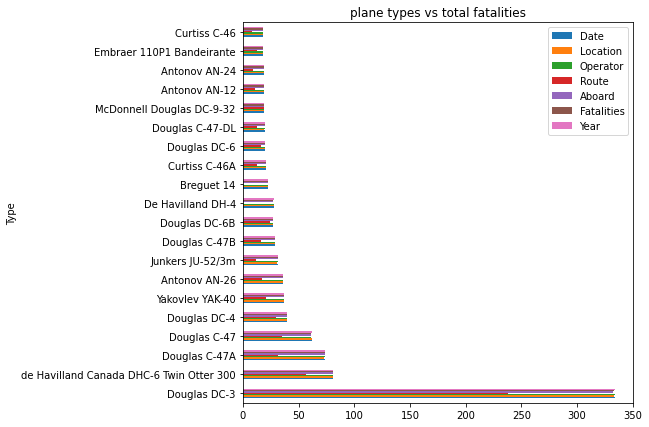

In [23]:
topCrashedPlaneTypes.plot(kind='barh',figsize=(7,7),title='plane types vs total fatalities')